In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, 
                             plot_confusion_matrix, classification_report, roc_auc_score, plot_roc_curve,
                            ConfusionMatrixDisplay)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,
                              AdaBoostClassifier, VotingClassifier, BaggingClassifier)

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore') # Ensuring the notebook remains tidy

In [2]:
# Import features
merged = pd.read_csv("../data/selected_features.csv")
print(merged.shape)
merged.head(50)

(866, 186)


,date,eri,eri_1m_chg,eri_3m_chg,cesiusd_1w_chg,cesieur_1w_chg,cesigbp_1w_chg,cesijpy_1w_chg,cesicny_1w_chg,cesiglf_1w_chg,...,usd_bbdxy_1w_chg,usd_twi_4w_chg,usd_dxy_4w_chg,usd_bbdxy_4w_chg,usd_twi_13w_chg,usd_dxy_13w_chg,usd_bbdxy_13w_chg,usd_twi_26w_chg,usd_dxy_26w_chg,usd_bbdxy_26w_chg
0,2005-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-07-08,NaN,NaN,NaN,5.5,23.5,9.3,-15.4,-1.3,4.5,...,0.001331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-07-15,NaN,NaN,NaN,17.9,9.8,2.9,-6.7,17.1,9.2,...,-0.005873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-07-22,NaN,NaN,NaN,-7.3,39.5,34.6,-3.4,16.1,9.0,...,-0.000892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-07-29,NaN,NaN,NaN,7.1,35.8,-2.9,5.1,-1.3,11.1,...,-0.003235,-0.009202,-0.008654,-0.008654,NaN,NaN,NaN,NaN,NaN,NaN
5,2005-08-05,NaN,NaN,NaN,-1.3,18.0,12.8,-4.6,-1.3,2.9,...,-0.014438,-0.016649,-0.024266,-0.024266,NaN,NaN,NaN,NaN,NaN,NaN
6,2005-08-12,NaN,NaN,NaN,-19.4,-0.2,22.6,-5.2,-6.4,-5.7,...,-0.012264,-0.020045,-0.030539,-0.030539,NaN,NaN,NaN,NaN,NaN,NaN
7,2005-08-19,NaN,NaN,NaN,6.8,4.7,26.2,-7.0,-12.5,-2.9,...,0.018625,-0.001237,-0.011602,-0.011602,NaN,NaN,NaN,NaN,NaN,NaN
8,2005-08-26,NaN,NaN,NaN,-0.2,28.9,-0.6,-0.6,-2.6,4.6,...,-0.008352,-0.008818,-0.016676,-0.016676,NaN,NaN,NaN,NaN,NaN,NaN
9,2005-09-02,NaN,NaN,NaN,-14.9,-0.2,-2.5,-14.3,-3.7,-1.7,...,-0.017756,-0.010550,-0.019986,-0.019986,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Drop null values
merged.dropna(inplace=True)

In [4]:
merged.head()

,date,eri,eri_1m_chg,eri_3m_chg,cesiusd_1w_chg,cesieur_1w_chg,cesigbp_1w_chg,cesijpy_1w_chg,cesicny_1w_chg,cesiglf_1w_chg,...,usd_bbdxy_1w_chg,usd_twi_4w_chg,usd_dxy_4w_chg,usd_bbdxy_4w_chg,usd_twi_13w_chg,usd_dxy_13w_chg,usd_bbdxy_13w_chg,usd_twi_26w_chg,usd_dxy_26w_chg,usd_bbdxy_26w_chg
39,2006-03-31,0.107498,0.030015,-0.016110,17.2,69.8,4.0,10.9,1.1,20.3,...,-0.003775,0.008602,0.000781,0.000781,-0.008498,-0.015795,-0.015795,-0.000666,0.002346,0.002346
40,2006-04-07,0.123655,0.046663,0.009050,6.5,-12.2,-21.9,-13.4,1.8,1.2,...,-0.000446,-0.005328,-0.012768,-0.012768,0.003945,0.008773,0.008773,-0.004239,0.005832,0.005832
41,2006-04-14,0.128413,0.048658,0.010867,9.5,-11.5,-1.1,4.3,24.3,3.1,...,-0.001115,0.006091,0.007535,0.007535,0.005024,0.007875,0.007875,-0.008379,0.001453,0.001453
42,2006-04-21,0.159766,0.066070,0.060021,16.8,-2.4,-15.8,5.7,131.0,14.8,...,-0.017189,-0.013324,-0.022427,-0.022427,-0.004677,-0.010341,-0.010341,-0.023070,-0.025025,-0.025025
43,2006-04-28,0.200645,0.093147,0.113833,30.3,47.4,4.3,-1.1,-3.4,15.8,...,-0.022033,-0.024053,-0.040343,-0.040343,-0.015075,-0.035938,-0.035938,-0.029972,-0.038844,-0.038844


In [5]:
merged['date'] = pd.to_datetime(merged['date'], format='%Y-%m-%d')

In [6]:
X = merged
X_train = X.loc[X['date'] < '2015']
X_validate = X.loc[(X['date'] >= '2015') & (X['date'] < '2019')]
X_test = X.loc[(X['date'] >= '2019') & (X['date'] != '2020')]

In [7]:
print(X_train.shape[0]/merged.shape[0], X_validate.shape[0]/merged.shape[0], X_test.shape[0]/merged.shape[0])

0.5552855407047388 0.25394896719319565 0.19076549210206561


In [8]:
# Import features
returns = pd.read_csv("../data/monthly_returns.csv")
print(returns.shape)
returns.tail()

(866, 7)


,date,S&P 500,Stoxx 50,FTSE 100,Topix,MSCI Asia ex-Japan,MSCI All-Country World
861,2021-12-31,-7.014632,-3.757203,1.104063,-5.794221,-4.311524,-6.585589
862,2022-01-07,NaN,NaN,NaN,NaN,NaN,NaN
863,2022-01-14,NaN,NaN,NaN,NaN,NaN,NaN
864,2022-01-21,NaN,NaN,NaN,NaN,NaN,NaN
865,2022-01-28,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
X_validate.drop(columns='date', inplace=True)

In [11]:
def pullback_func(x):
    if x < 0:
        return 1
    else:
        return 0

In [12]:
y = returns

y_train = y.loc[(y['date'] >= '2006-03-31') & (y['date'] < '2015')]
y_validate = y.loc[(y['date'] >= '2015') & (y['date'] < '2019')]
y_test = y.loc[(y['date'] >= '2019') & (y['date'] != '2020')]

In [13]:
y_train = y_train.set_index('date')['S&P 500'].apply(func=pullback_func)
y_validate = y_validate.set_index('date')['S&P 500'].apply(func=pullback_func)
y_test = y_test.set_index('date')['S&P 500'].apply(func=pullback_func)

In [14]:
y_train.reset_index().drop('date', axis=1, inplace=True)

In [15]:
y_validate.reset_index().drop('date', axis=1, inplace=True)

In [16]:
# Set-up pipeline for CVEC
pipe_logr = Pipeline([
    ('ss', StandardScaler()),
    ('logr', LogisticRegression())
])

In [17]:
# Set up parameters specific to CVEC and logistic regression
logr_cvec_params = {
    'logr__max_iter': [100, 200]
}

In [56]:
pipe_logr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ss', 'logr', 'ss__copy', 'ss__with_mean', 'ss__with_std', 'logr__C', 'logr__class_weight', 'logr__dual', 'logr__fit_intercept', 'logr__intercept_scaling', 'logr__l1_ratio', 'logr__max_iter', 'logr__multi_class', 'logr__n_jobs', 'logr__penalty', 'logr__random_state', 'logr__solver', 'logr__tol', 'logr__verbose', 'logr__warm_start'])

In [18]:
# Initialize GridSearchCV
gs_logr = GridSearchCV(pipe_logr, param_grid = logr_cvec_params, cv=5, verbose=1)

In [19]:
# Fit model
gs_logr.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('logr', LogisticRegression())]),
             param_grid={'logr__max_iter': [100, 200]}, verbose=1)

In [30]:
gs_logr.best_estimator_

Pipeline(steps=[('ss', StandardScaler()), ('logr', LogisticRegression())])

In [31]:
gs_logr.best_estimator_.score(X_train, y_train)

0.8949671772428884

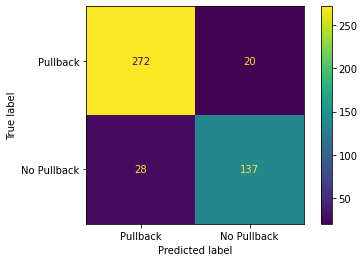

In [21]:
# Generating predictions for our test data
gs_logr_preds = gs_logr.predict(X_train)

# Creating a confusion matrix
gs_logr_cm = confusion_matrix(y_train, gs_logr_preds)
ConfusionMatrixDisplay(confusion_matrix = gs_logr_cm, display_labels=['Pullback', 'No Pullback']).plot();

In [32]:
gs_logr.best_estimator_.score(X_validate, y_validate)

0.5311004784688995

In [45]:
gs_logr.best_estimator_.score(X_test, y_test2)

0.5923566878980892

In [47]:
gs_logr.best_estimator_.f1_score(X_test, y_test2)

AttributeError: 'Pipeline' object has no attribute 'f1_score'

In [44]:
y_test2 = y_test.iloc[:(len(y_test)-4)]

In [41]:
print(X_train.shape, y_train.shape)

(457, 185) (457,)


In [43]:
print(X_validate.shape, y_validate.shape)

(209, 185) (209,)


In [46]:
print(X_test.shape, y_test2.shape)

(157, 185) (157,)


In [48]:
f1_score(y_test2, gs_logr.best_estimator_.predict(X_test))

0.3725490196078432